### IDs:
Insert yours IDs to the cell below

ID #1: 301672028

ID #2: 204502926


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

#### IMPORTS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats # pearsonr, kendalltau, spearmanr etc.
import time

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

##### Answer:

In [2]:
n = 50 # 50 datapoints

def print_table_and_jointplot(x, y, d = True):
    # table description of the example data
    table = pd.DataFrame(np.vstack((x,y)).T, columns = ['x', 'y'])
    
    if d != False:
        table['d_i'] = table['x'] - table['y']
    
    print(table)

    p = sns.jointplot(data=table, x=x, y=y, marker='+')
    p.fig.suptitle('x & y values JointPlot', fontsize=25)
    p.fig.subplots_adjust(top=0.9) # Reduce plot to make room for title

For each section, we create x and y vectors of size n each.

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

Overall Pearson correlation between x & y is -0.999998000834983
Excluding the last value of each, we get 1.0

        x      y
0   0.000  0.000
1   0.000  0.000
2   0.000  0.000
3   0.000  0.000
4   0.000  0.000
5   0.000  0.000
6   0.000  0.000
7   0.000  0.000
8   0.000  0.000
9   0.000  0.000
10  0.000  0.000
11  0.000  0.000
12  0.000  0.000
13  0.000  0.000
14  0.000  0.000
15  0.000  0.000
16  0.000  0.000
17  0.000  0.000
18  0.000  0.000
19  0.000  0.000
20  0.000  0.000
21  0.000  0.000
22  0.000  0.000
23  0.000  0.000
24  0.000  0.000
25  0.000  0.000
26  0.000  0.000
27  0.000  0.000
28  0.000  0.000
29  0.000  0.000
30  0.000  0.000
31  0.000  0.000
32  0.000  0.000
33  0.000  0.000
34  0.000  0.000
35  0.000  0.000
36  0.000  0.000
37  0.000  0.000
38  0.000  0.000
39  0.000  0.000
40  0.000  0.000
41  0.000  0.000
42  0.000  0.000
43  0.000  0.000
44  0.000  0.000
45  0.000  0.000
46  0.000  0.000
47  0.000  0.000
48  0.001  0.001
49 -1.000  1.000


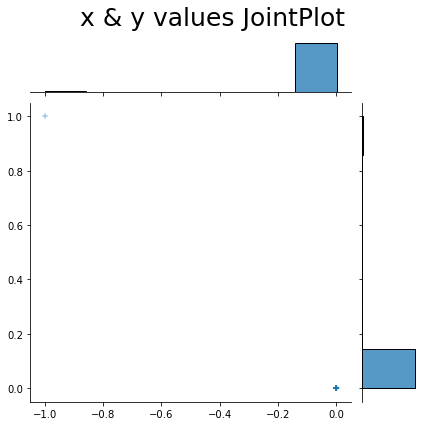

In [3]:
x = np.zeros(n)
y = np.zeros(n)

x[n-2] = 0.001
y[n-2] = 0.001

# these are the last values we will exclude
x[n-1] = -1
y[n-1] = 1

overall_correlation = stats.pearsonr(x, y)[0]
partial_correlation = stats.pearsonr(x[:n-1], y[:n-1])[0]

print(f'\
Overall Pearson correlation between x & y is {overall_correlation}\n\
Excluding the last value of each, we get {partial_correlation}\n')

print_table_and_jointplot(x, y, d=False)

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.45

##### Answer:
If all n ranks are distinct integers, so Spearman can be computed with the popular formula:
$$
\rho=1-\frac{6 \sum d_{i}^{2}}{n\left(n^{2}-1\right)}
$$
Where $d_i = rank(x_i) - rank(y_i)$<br>
So in our case, we need to "mess" with it such that the ranks will not all increase together, so we split it to two increasing lines
and therefore, the distances are quite large (all are of size 25, with pluses and minuses, see table below), so the correlation value will be relatively small.

Kendall correlation simply subtracts the number of discordant from concordant pairs, so the squaring of d's in Spearman has a larger effect on the resulting correlation value.
And also, there are many concordant pairs

Kendall correlation between x & y is -0.020408163265306124
Spearman correlation between x & y is -0.5006002400960383
Kendall > Spearman by 0.4801920768307322

       x     y   d_i
0    1.0  26.0 -25.0
1    2.0  27.0 -25.0
2    3.0  28.0 -25.0
3    4.0  29.0 -25.0
4    5.0  30.0 -25.0
5    6.0  31.0 -25.0
6    7.0  32.0 -25.0
7    8.0  33.0 -25.0
8    9.0  34.0 -25.0
9   10.0  35.0 -25.0
10  11.0  36.0 -25.0
11  12.0  37.0 -25.0
12  13.0  38.0 -25.0
13  14.0  39.0 -25.0
14  15.0  40.0 -25.0
15  16.0  41.0 -25.0
16  17.0  42.0 -25.0
17  18.0  43.0 -25.0
18  19.0  44.0 -25.0
19  20.0  45.0 -25.0
20  21.0  46.0 -25.0
21  22.0  47.0 -25.0
22  23.0  48.0 -25.0
23  24.0  49.0 -25.0
24  25.0  50.0 -25.0
25  26.0   1.0  25.0
26  27.0   2.0  25.0
27  28.0   3.0  25.0
28  29.0   4.0  25.0
29  30.0   5.0  25.0
30  31.0   6.0  25.0
31  32.0   7.0  25.0
32  33.0   8.0  25.0
33  34.0   9.0  25.0
34  35.0  10.0  25.0
35  36.0  11.0  25.0
36  37.0  12.0  25.0
37  38.0  13.0  25.0
38  39.0  14.0  25.0
3

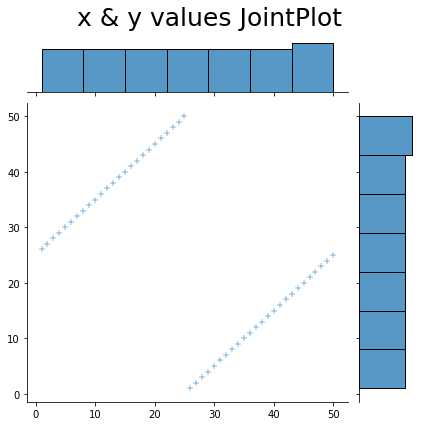

In [4]:
x = np.arange(n) + 1
y = np.empty(n)

y[0:25] = (np.arange(25) + 1) + 25
y[25:] = (np.arange(25) + 1)

kendall_correlation = stats.kendalltau(x, y)[0]
spearman_correlation = stats.spearmanr(x, y)[0]

print(f'\
Kendall correlation between x & y is {kendall_correlation}\n\
Spearman correlation between x & y is {spearman_correlation}\n\
Kendall > Spearman by {kendall_correlation - spearman_correlation}\n')

print_table_and_jointplot(x, y)

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

##### Answer:
Here, we reverse y values (change the slope from 1.B to its negative value) so the $d_i$'s are much smaller than those in section 1.B and thus the result is much larger (values are from 0-25, with pluses and minuses, see table below).<br>
The concordant and discordant pairs here are exactly opposite to 1.B, hence the minus of Kendall's previous value.

Kendall correlation between x & y is 0.020408163265306124
Spearman correlation between x & y is 0.5006002400960383
Kendall < Spearman by 0.4801920768307322

       x     y   d_i
0    1.0  25.0 -24.0
1    2.0  24.0 -22.0
2    3.0  23.0 -20.0
3    4.0  22.0 -18.0
4    5.0  21.0 -16.0
5    6.0  20.0 -14.0
6    7.0  19.0 -12.0
7    8.0  18.0 -10.0
8    9.0  17.0  -8.0
9   10.0  16.0  -6.0
10  11.0  15.0  -4.0
11  12.0  14.0  -2.0
12  13.0  13.0   0.0
13  14.0  12.0   2.0
14  15.0  11.0   4.0
15  16.0  10.0   6.0
16  17.0   9.0   8.0
17  18.0   8.0  10.0
18  19.0   7.0  12.0
19  20.0   6.0  14.0
20  21.0   5.0  16.0
21  22.0   4.0  18.0
22  23.0   3.0  20.0
23  24.0   2.0  22.0
24  25.0   1.0  24.0
25  26.0  50.0 -24.0
26  27.0  49.0 -22.0
27  28.0  48.0 -20.0
28  29.0  47.0 -18.0
29  30.0  46.0 -16.0
30  31.0  45.0 -14.0
31  32.0  44.0 -12.0
32  33.0  43.0 -10.0
33  34.0  42.0  -8.0
34  35.0  41.0  -6.0
35  36.0  40.0  -4.0
36  37.0  39.0  -2.0
37  38.0  38.0   0.0
38  39.0  37.0   2.0
39 

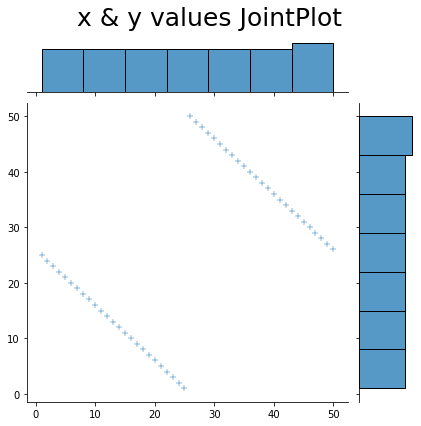

In [5]:
x = np.arange(n) + 1
y = np.empty(n)

y[0:25] = (np.arange(25) + 1)[::-1] # reverse -> number are decreasing
y[25:] = (np.arange(25) + 1)[::-1] + 25

kendall_correlation = stats.kendalltau(x, y)[0]
spearman_correlation = stats.spearmanr(x, y)[0]

print(f'\
Kendall correlation between x & y is {kendall_correlation}\n\
Spearman correlation between x & y is {spearman_correlation}\n\
Kendall < Spearman by {spearman_correlation - kendall_correlation}\n')

print_table_and_jointplot(x, y)

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

##### Answer:
Pearson "seeks" perfect linearity between x and y (in order to be 1 or -1 for example), while Spearman cares only for the order of the ranks.<br>
So we can simply make the graph non-linear monotonically increasing.

We saw a similar example in class (lecture "p-Values and introduction to correlations", slide 37).

In [ ]:
x = np.arange(n) + 1
# y = np.zeros(n)

# # When passing x, it takes too long to run, and a tail of 28 (n - index) is enough for the desired difference
# index = 22
# y[index:] = np.exp((np.arange(n - index)))

y = 4**x

pearson_correlation = stats.pearsonr(x, y)[0]
spearman_correlation = stats.spearmanr(x, y)[0]

print(f'\
Pearson correlation between x & y is {pearson_correlation}\n\
Spearman correlation between x & y is {spearman_correlation}\n\
Pearson < Spearman by {spearman_correlation - pearson_correlation}\n')

print_table_and_jointplot(x, y)

Pearson correlation between x & y is 0.31097483629095957
Spearman correlation between x & y is 0.9999999999999999
Pearson < Spearman by 0.6890251637090403

       x             y           d_i
0    1.0  4.000000e+00 -3.000000e+00
1    2.0  1.600000e+01 -1.400000e+01
2    3.0  6.400000e+01 -6.100000e+01
3    4.0  2.560000e+02 -2.520000e+02
4    5.0  1.024000e+03 -1.019000e+03
5    6.0  4.096000e+03 -4.090000e+03
6    7.0  1.638400e+04 -1.637700e+04
7    8.0  6.553600e+04 -6.552800e+04
8    9.0  2.621440e+05 -2.621350e+05
9   10.0  1.048576e+06 -1.048566e+06
10  11.0  4.194304e+06 -4.194293e+06
11  12.0  1.677722e+07 -1.677720e+07
12  13.0  6.710886e+07 -6.710885e+07
13  14.0  2.684355e+08 -2.684354e+08
14  15.0  1.073742e+09 -1.073742e+09
15  16.0  4.294967e+09 -4.294967e+09
16  17.0  1.717987e+10 -1.717987e+10
17  18.0  6.871948e+10 -6.871948e+10
18  19.0  2.748779e+11 -2.748779e+11
19  20.0  1.099512e+12 -1.099512e+12
20  21.0  4.398047e+12 -4.398047e+12
21  22.0  1.759219e+13 -1.7592

KeyboardInterrupt: 

#### 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

##### Answer:
A little bit of playing with numbers, but in general, the goal was for x and y to be **linearly increasing** for Pearson to have a high-enough value (and so their ranks are also ordered for Spearman),<br>
but for the distance, $d$, between corresponding ranks to be large and for one entry to be extremely detached - this will "hurt" Spearman more than Pearson, because Spearman is more sensitive to a big mismatch (disorder) in the data.

Pearson correlation between x & y is 0.41839142784428485
Spearman correlation between x & y is -0.8823529411764706
Pearson > Spearman by 1.3007443690207554

        x          y        d_i
0     1.0   1.000000   0.000000
1     2.0   0.979592   1.020408
2     3.0   0.959184   2.040816
3     4.0   0.938776   3.061224
4     5.0   0.918367   4.081633
5     6.0   0.897959   5.102041
6     7.0   0.877551   6.122449
7     8.0   0.857143   7.142857
8     9.0   0.836735   8.163265
9    10.0   0.816327   9.183673
10   11.0   0.795918  10.204082
11   12.0   0.775510  11.224490
12   13.0   0.755102  12.244898
13   14.0   0.734694  13.265306
14   15.0   0.714286  14.285714
15   16.0   0.693878  15.306122
16   17.0   0.673469  16.326531
17   18.0   0.653061  17.346939
18   19.0   0.632653  18.367347
19   20.0   0.612245  19.387755
20   21.0   0.591837  20.408163
21   22.0   0.571429  21.428571
22   23.0   0.551020  22.448980
23   24.0   0.530612  23.469388
24   25.0   0.510204  24.489796
25   26.0  

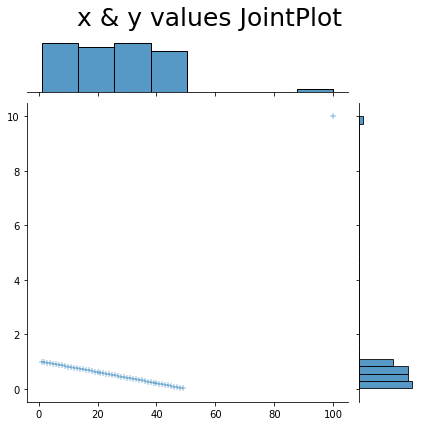

In [7]:
x = np.arange(n) + 1
y = np.linspace(0, 1, num=n)[::-1]

x[n-1] = 100
y[n-1] = 10

pearson_correlation = stats.pearsonr(x, y)[0]
spearman_correlation = stats.spearmanr(x, y)[0]

print(f'\
Pearson correlation between x & y is {pearson_correlation}\n\
Spearman correlation between x & y is {spearman_correlation}\n\
Pearson > Spearman by {pearson_correlation - spearman_correlation}\n')

print_table_and_jointplot(x, y)

#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

##### Answer: 

This scenario is not possible.<br>
We first note that **it is** possible that Kendall and Spearman will have different signs.<br>
However, our intuition says that the diff between them cannot pass 0.5, and certainly not 1.0 or higher.<br>
<br>
If we would need to suggest an hypothesis here - it would be that when n goes to infinity, the maximal absolute diff of Kendall-Spearman would be 0.5, for example when Kendall=0 and Spearman=0.5.<br>
<br>
Our intuition is based on 3 main points:
1. Both Kendall and Spearman scores are based on the ranks of x and y.
2. -1.2 is a very big diff. Let's look at the 2 extreme cases - <br>
    a. Kendall = -0.2, Spearman = 1.0<br>
    b. Kendall = -1.0, Spearman = 0.2<br>
    
Both can't exist, since in case 1 - if Spearman = 1.0 then it means that all the data is monotonically increasing and all the ranks agree, and in the context of Kendall this means that all the pairs are concordant, so Kendall will also equal 1<br>
    
In case 2 - if Kendall = -1.0 then it means that all the pairs are discordant.<br>
This means that all the data is monotonically decreasing, and therefore Spearman will also equal -1
  
3. We played with data examples and also ran brute-force (all permutations) on small samples (up to 10),<br>
then we took the pattern that gave the maximum diff we got, and used the same ranking with bigger and bigger n's.<br>
We got closer to a diff of -0.5, and were not able to pass it.

***
### Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


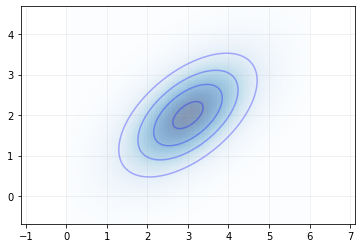

In [8]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

#### Answer:

In [9]:
# read CSV
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv('heart.csv', sep = '\t', names = column_names, header = 0)
#                    index_col=False)
# data["class"] = data["class"].map({1:"ill", 2:"healthy"})



# Variables or features explanations:
# ==================================
# 0. age (Age in years)
# 1. sex : (1 = male, 0 = female)
# 2. cp (Chest Pain Type): [0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic]
# 3. trestbps (Resting Blood Pressure in mm/hg )
# 4. chol (Serum Cholesterol in mg/dl)
# 5. fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes]
# 6. restecg (Resting ECG): [0: normal, 1: having ST-T wave abnormality , 2: showing probable or definite left ventricular hypertrophy]
# 7. thalach (maximum heart rate achieved)
# 8. exang (Exercise Induced Angina): [1 = yes, 0 = no]
# 9. oldpeak (ST depression induced by exercise relative to rest)
# 10. slope (the slope of the peak exercise ST segment)
# 11. ca [number of major vessels (0–3)]
# 12. thal : [1 = normal, 2 = fixed defect, 3 = reversible defect]
# 13. target: [0 = disease, 1 = no disease]

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1.0,NaN,NaN,0.0,0.0,172.0,0,1.4,2,0,2,1
3,NaN,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0,0.8,2,0,2,1
4,NaN,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,NaN,0.0,0.0,140.0,NaN,0.0,1.0,123.0,1,0.2,1,0,3,0
299,NaN,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0,NaN,1,0,3,0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,NaN,0,3.4,1,2,3,0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1,1.2,1,1,3,0


In [10]:
# another way to see some info on the data (null-values, types, etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       295 non-null    float64
 1   sex       299 non-null    float64
 2   cp        298 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       300 non-null    float64
 6   restecg   301 non-null    float64
 7   thalach   299 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   298 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 33.3 KB


In [11]:
# There are missing values in the data.
# Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
nan_values = data.isnull().sum()
print(nan_values)
print()
data = data.fillna(data.median())
data.isnull().sum()

age         8
sex         4
cp          5
trestbps    6
chol        6
fbs         3
restecg     2
thalach     4
exang       0
oldpeak     5
slope       0
ca          0
thal        0
target      0
dtype: int64



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
# Pandas DataFrame.describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.
# It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.
# www.javatpoint.com/pandas-dataframe-describe#:~:text=Pandas%20DataFrame.-,describe(),sets%20of%20mixed%20data%20types.

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.405941,0.686469,0.970297,131.630363,245.848185,0.148515,0.524752,149.610561,0.326733,1.036634,1.399340,0.729373,2.313531,0.544554
std,8.964069,0.464696,1.024101,17.358758,51.604360,0.356198,0.519693,22.858624,0.469794,1.158160,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
# Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean 
# is larger/smaller than the disease population (target = 1) mean.



<Figure size 1080x1080 with 0 Axes>

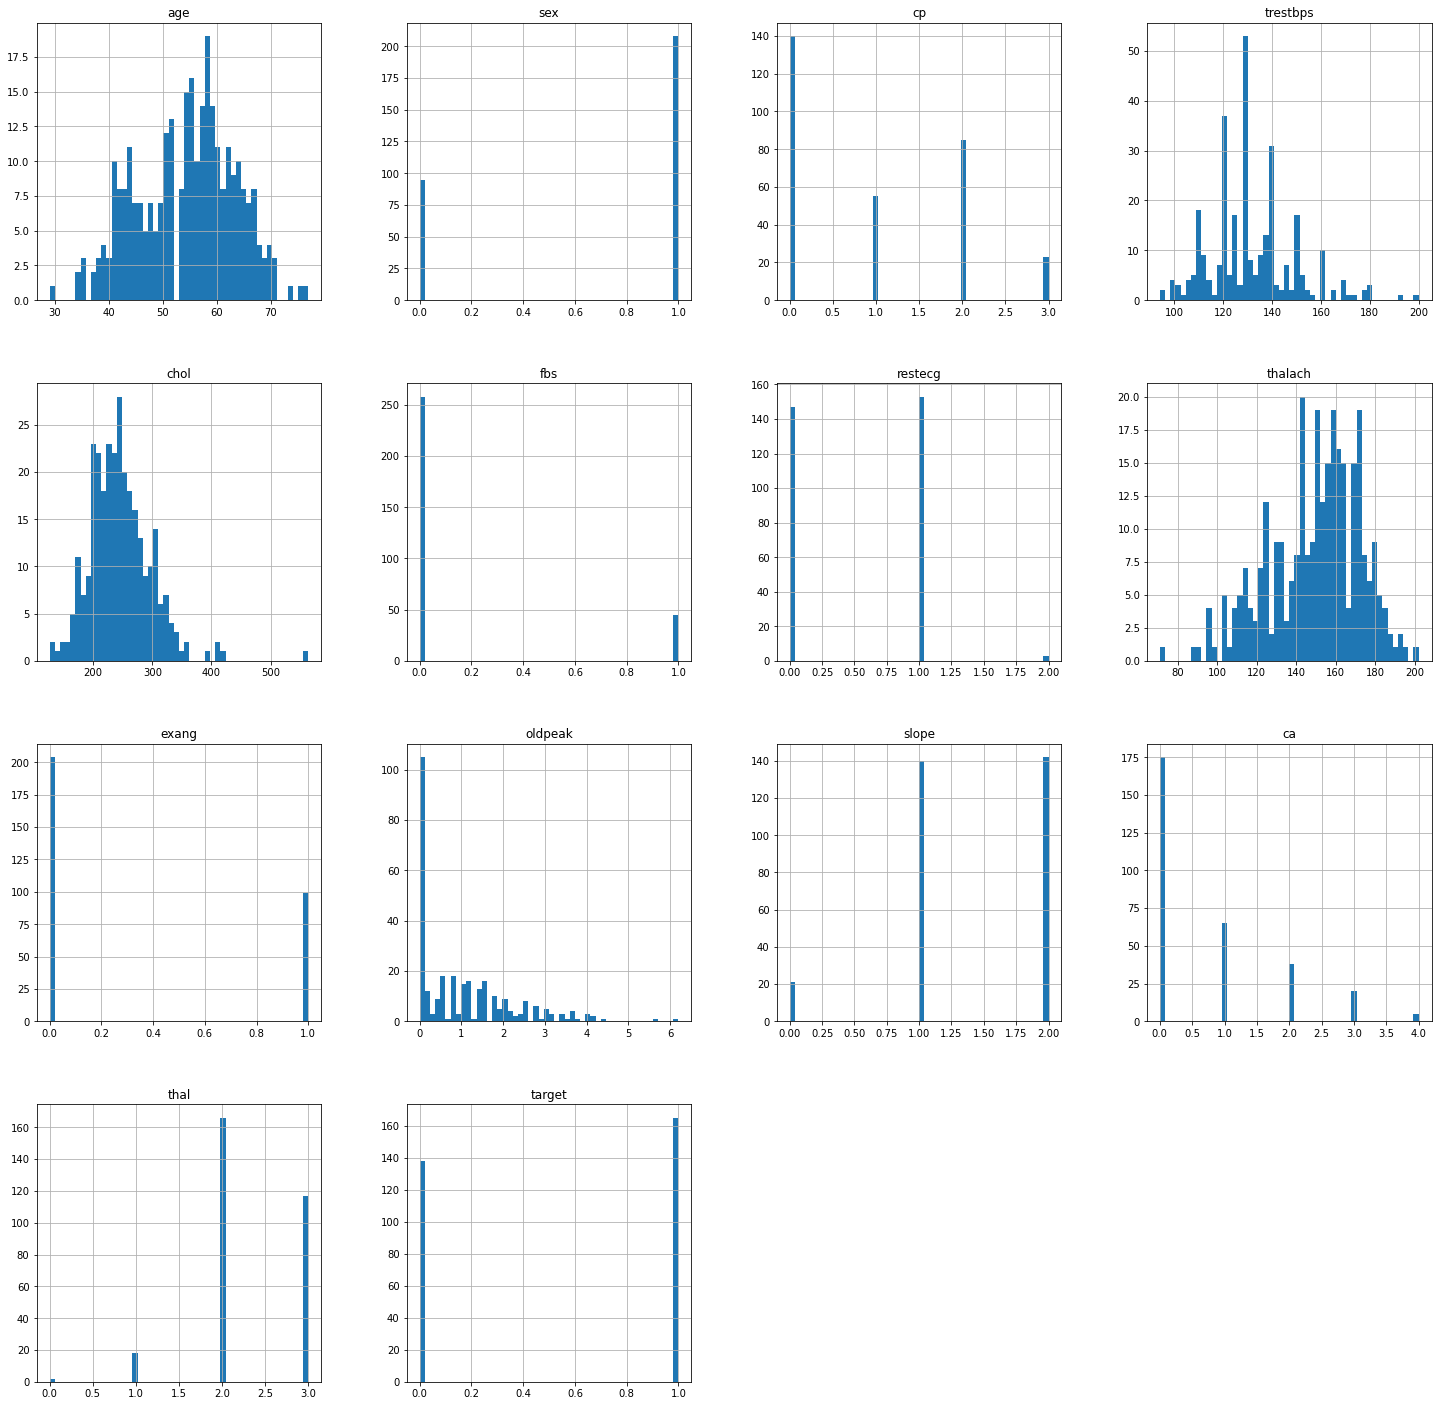

In [14]:
# Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
plt.figure(figsize=(15,15))
data.hist(figsize=(25,25),bins=50)
plt.show()

#### Let's examine how the distributions look for each feature:
==========================================================<br>
0: age (Age in years) - <b>Normal</b><br>
1: sex : (1 = male, 0 = female) - <b>uniform (only 2 binary values)</b><br>
2: cp (Chest Pain Type): [0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic] - <b>uniform (only 4 values)</b><br>
3: trestbps (Resting Blood Pressure in mm/hg ) - <b>Normal</b><br>
4: chol (Serum Cholesterol in mg/dl) - <b>Normal</b><br>
5: fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes] - <b>uniform (only 2 binary values)</b><br>
6: restecg (Resting ECG): [0: normal, 1: having ST-T wave abnormality , 2: showing probable or definite left ventricular hypertrophy] - <b>uniform (only 3 values)</b><br>
7: thalach (maximum heart rate achieved) - <b>Normal</b><br>
8: exang (Exercise Induced Angina): [1 = yes, 0 = no] - <b>uniform (only 2 binary values)</b><br>
9: oldpeak (ST depression induced by exercise relative to rest) - <b>Log-Normal</b><br>
10: slope (the slope of the peak exercise ST segment) - <b>Normal</b><br>
11: ca [number of major vessels (0–3)] - <b>Normal</b><br>
12: thal : [1 = normal, 2 = fixed defect, 3 = reversible defect] - <b>uniform (only 3 values)</b><br>
13: target: [0 = disease, 1 = no disease] - <b>uniform (only 2 binary values)</b><br>

In [15]:
# distribution_dict = {'age': 
#                      'sex': 
#                      'cp': 
#                      'trestbps': 
#                      'chol': 
#                      'fps': 
#                      'restecg': 
#                      'thalach': 
#                      'exang': 
#                      'oldpeak': 
#                      'slope': 
#                      'ca': 
#                      'thal': 
#                      'target': 
#                     }

***
### Question 3 - Heavy Tailed distributions (10 points)

Recall the definition of Heavy Tailed distribtion from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

#### 3.A
Does the standard normal distribution have a heavy right tail? prove your answer.

##### Answer:

<b>The standard normal distribution does NOT have a heavy right tail</b>.<br>

<u>Proof</u>:<br>
Let $X \sim N(0,1)$ be a standard normal distribution random variable.<br>

"Heavy-tailed" distributions are those whose tails are not exponentially bounded.<br>
Unlike the bell curve with a "normal distribution", heavy-tailed distributions approach zero at a slower rate and can have outliers with very high values.<br>
In risk terms, heavy-tailed distributions have a higher probability of a large, unforeseen event occurring.<br>


$$\lim_{x\to\infty} e^{tx}P(X > x) = \lim_{x\to\infty} e^{tx}\big(1-P(X \leq x)\big) = \lim_{x\to\infty} e^{tx}\big(1-\Phi(x)\big)$$

$$e^x = \frac{1}{e^{-x}}$$ 
so:
$$\lim_{x\to\infty} e^{tx}\big(1-\Phi(x)\big) = \lim_{x\to\infty} \frac{1-\Phi(x)}{e^{-tx}}$$

After applying L'Hôpital's rule $\big(\lim_{x \to a} \frac{f(x)}{g(x)} = \lim_{x \to a} \frac{f'(x)}{g'(x)} \big)$, we get:<br>

$$\lim_{x\to\infty} \frac{1-\Phi(x)}{e^{-tx}} = \lim_{x\to\infty} \frac{\phi(x)}{t \cdot e^{-tx}} = \lim_{x\to\infty} \frac{\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}}{t \cdot e^{-tx}} = \lim_{x\to\infty} \frac{e^{- \frac {x^2}{2}} e^{tx}}{t \sqrt{2\pi}} = \lim_{x\to\infty} \frac{e^{tx}}{e^{\frac {x^2}{2}} \cdot t \sqrt{2\pi}}$$

It's clear that $x^2$ go to infinity faster than x, so as x goes to infinity, this term <b>goes to 0</b>.

#### 3.B
Does the standard log-normal distribution have a heavy right tail? prove your answer.

##### Answer:
<b>The standard log-normal distribution have a heavy right tail<b>.<br>

<u>Proof</u>:<br>
Let $Y = e^{X}$ be a log-normal distribution random variable (where X is the standard normal).<br>

$$\lim_{x\to\infty} e^{tx}P(Y > x) = \lim_{x\to\infty} e^{tx}\big(1-P(Y \leq x)\big) = \lim_{x\to\infty} e^{tx}\big(1-P(e^X \leq x)\big) = \lim_{x\to\infty} e^{tx}\big(1-P(X \leq ln x)\big) = \lim_{x\to\infty} e^{tx}\big(1-\Phi(ln x)\big)$$

$$e^x = \frac{1}{e^{-x}}$$ 
so:
$$\lim_{x\to\infty} e^{tx}\big(1-\Phi(ln x)\big) = \lim_{x\to\infty} \frac{1-\Phi(ln x)}{e^{-tx}}$$

After applying L'Hôpital's rule $\big(\lim_{x \to a} \frac{f(x)}{g(x)} = \lim_{x \to a} \frac{f'(x)}{g'(x)} \big)$, we get:<br>

$$\lim_{x\to\infty} \frac{1-\Phi(ln x)}{e^{-tx}} = \lim_{x\to\infty} \frac{\phi(ln x)}{t \cdot e^{-tx}} = \lim_{x\to\infty} \frac{\frac{1}{x \sqrt{2\pi}}e^{-\frac{1}{2} (ln x)^2}}{t \cdot e^{-tx}} = \lim_{x\to\infty} \frac{e^{tx}} {e^{\frac {(ln x)^2}{2}} \cdot tx \sqrt{2\pi}}$$

Of course that ln_x goes to infinity as x goes to infinity,<br>
BUT(!) <b>(positive) exponentials grow faster than (positive) powers that grow faster the logs</b> (L'Hôpital's rule can justify these statements) and since ln is a logarithmic function, the term above follows the behaviour of $e^{tx}$ and goes to <b>infinity</b> overall.
$$\forall t > 0, \lim_{x\to\infty} e^{tx}P(Y > x) = \infty$$

***
### Question 4 - CLT for Markov chains (20 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, $X_0$, is $U(1...6)$, i.e. $P(X_0=i)=\pi_0(i)=1/6, \forall i\in{\{1,..,6\}}$<br>
After i rolls are determined the $i+1^{st}, X_{i+1},$ is drawn according to the row that corresponds to the value of $X_i$ in the matrix $T$ below. <br>
In other words, $T$ is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

##### Answer:

In [4]:
# Build T
T = []
row = [0.4, 0.2, 0.1, 0, 0.1, 0.2]

for i in range(len(row) - 1):
    T.append(row)
    row = [row[len(row) -1]] + row[:-1]
T.append(row)

print(f'T:\n{T}')
###

initial_probabilities = np.ones(6) / 6 # [1/6, ..., 1/6]
possible_values = np.arange(1, 7, 1) # 1 to 6

T:
[[0.4, 0.2, 0.1, 0, 0.1, 0.2], [0.2, 0.4, 0.2, 0.1, 0, 0.1], [0.1, 0.2, 0.4, 0.2, 0.1, 0], [0, 0.1, 0.2, 0.4, 0.2, 0.1], [0.1, 0, 0.1, 0.2, 0.4, 0.2], [0.2, 0.1, 0, 0.1, 0.2, 0.4]]


#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

##### Answer:
1. We expect the average value of all 30 numbers in a trajectory to be 3.5 because we simply roll a fair die 30 times, and 3.5 is the avrage result of it.

In [5]:
# 2

np.random.seed(0) # for consistency


def compute_trajectory(length):
    probabilities = initial_probabilities # the initial distribution is uniform and only after it changes
    trajectory = np.zeros(length).astype(int)
    
    for i in range(length):
        trajectory[i] = np.random.choice(possible_values, p = probabilities) # We take a random result for the toss, given the current probabilities for the current X_i
        probabilities = T[trajectory[i] - 1] # override previous probabilites with the next probabilities in current row in T
    
    return trajectory


def compute_averages_and_plot(trajectories = 1000, length = 30):
    trajectories_list = []

    for i in range(trajectories):
        trajectories_list.append(compute_trajectory(length))

    # The average value of each such trajectory
    averages = np.average(trajectories_list, axis = 1)

    # Draw a histogram of the 1000 numbers you received, using 20 bins
    fig = plt.figure(figsize=(22, 6))
    plt.hist(averages, bins=20, density=True, label='Trajectories averages')

    mean = np.mean(averages)
    std = np.std(averages)

    # we plot also a Normal Dist. curve with the same mean and std to show similarity with our results
    x = np.linspace(np.min(averages), np.max(averages))
    y = stats.norm.pdf(x, mean, std) 
    plt.plot(x, y, label='Normal Distribution curve')

    # plt.ylabel('???', fontsize=13)
    plt.xlabel('Average value', fontsize=13)
    plt.title('Trajectories averages histogram', fontsize=20)
    plt.legend(loc='upper left')
    plt.show()
    
    return averages, mean, std

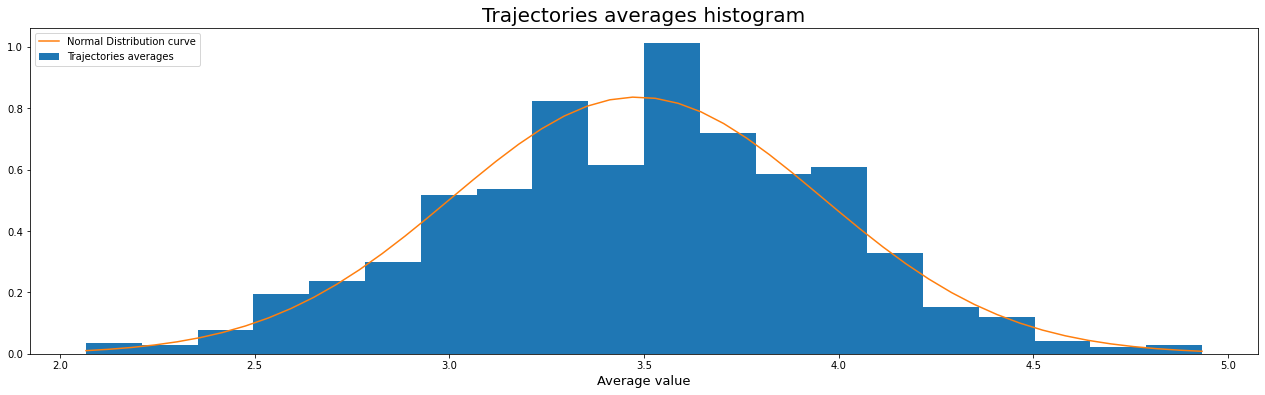

In [18]:
a_averages, a_mean, a_std = compute_averages_and_plot(trajectories = 1000, length = 30)

3. The distribution looks like the Normal distribution, and as we know - all distributions tend to converge to the Normal Distribution with enough samples becasue of the Central Limit Theorem.<br>
So the CLT is also true to Markov chains, as Zohar stated in class.

In [19]:
print(f'A.\nThe empirical mean is {a_mean} which is very close to our initial estimate of 3.5.\nThe empirical std is {a_std}')

A.
The empirical mean is 3.4820666666666664 which is very close to our initial estimate of 3.5.
The empirical std is 0.47714958753926306


##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

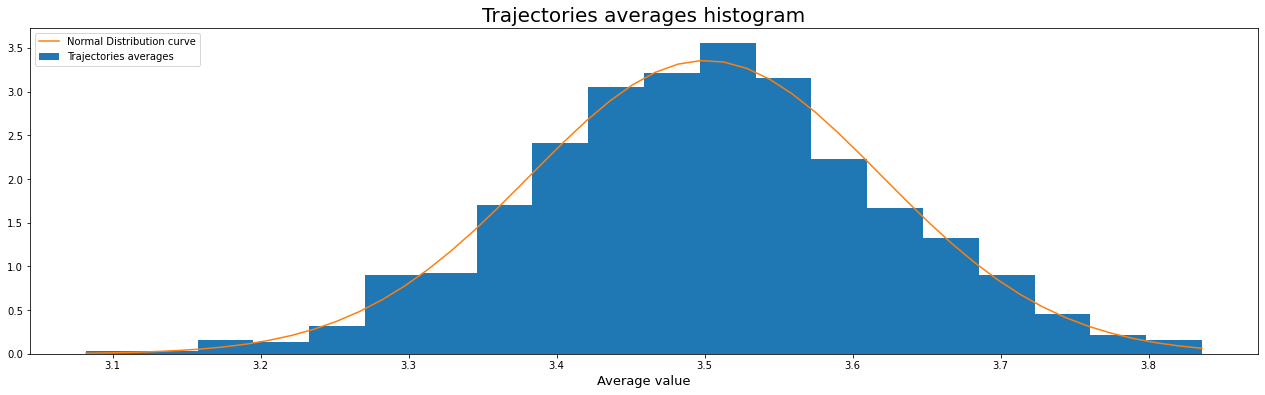

In [20]:
b_averages, b_mean, b_std = compute_averages_and_plot(trajectories = 1000, length = 500)

3. Same as 4A.2

In [21]:
print(f'B.\nThe empirical mean is {b_mean} which is very close to our initial estimate of 3.5.\nThe empirical std is {b_std}')

B.
The empirical mean is 3.50072 which is very close to our initial estimate of 3.5.
The empirical std is 0.118868438199549


#### 4.C
Draw normal fit curves on your two histograms.

In [22]:
# Done in the previous sections. Please see plots above.

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

##### Answer:
We calculate the Covariance using the formula:
$$
Cov(X_0, X_i) = E(X_0X_i) - E(X_0)E(X_i)
$$

$E(X_0)$ is the mean of the initial values [1, 2, 3, 4, 5, 6]  which is 3.5<br>
For each $X_i$ we can calculate $E(X_i)$ from the corresonding column in $T^{i}[column j]$ --> the probabilities after i steps.<br>
$E(X_i) = $ is calculated as follows:
$$
E(X_i) = {\sum_{n=1}^{k} \big( x_n \cdot P(X_i = x_n) \big) } = {\sum_{n=1}^{k} \big( x_n \cdot \sum_{j=1}^{k} (\pi_0[j] \cdot T^{i}[j,x_n]) \big)} = {\sum_{n=1}^{k} (x_n \cdot \pi_0 \cdot \pi_n)}
$$
Where x (lowercase) is the possible values vector for the die [1, 2, 3, 4, 5, 6]<br>

In order to calculate $E(X_0X_i)$ we have $k^2$ possible values (36 in our case).<br>
These are all combinations of the different pairs from the possible values (1-6 X 1-6), multiplied by $P(X_0,X_i)$<br>
More explicitly:
$$
1 \cdot 1 \cdot P(X_0 = 1, X_i = 1) + \newline
1 \cdot 2 \cdot P(X_0 = 1, X_i = 2) + \newline
\cdots + \newline
1 \cdot k \cdot P(X_0 = 1, X_i = k) + \newline
2 \cdot 1 \cdot P(X_0 = 2, X_i = 1) + \newline
2 \cdot 2 \cdot P(X_0 = 2, X_i = 2) + \newline
\cdots + \newline
2 \cdot k \cdot P(X_0 = 2, X_i = k) + \newline
\cdots + \newline
k \cdot k \cdot P(X_0 = k, X_i = k) \newline
$$

Which equals:
$$
1 \cdot 1 \cdot P(X_0 = 1) \cdot T^i[1,1] + \newline
1 \cdot 2 \cdot P(X_0 = 1) \cdot T^i[1,2] + \newline
\cdots + \newline
1 \cdot k \cdot P(X_0 = 1) \cdot T^i[1,k] + \newline
2 \cdot 1 \cdot P(X_0 = 2) \cdot T^i[2,1] + \newline
2 \cdot 2 \cdot P(X_0 = 2) \cdot T^i[2,2] + \newline
\cdots + \newline
2 \cdot k \cdot P(X_0 = 2) \cdot T^i[2,k] + \newline
\cdots + \newline
k \cdot k \cdot P(X_0 = k) \cdot T^i[k,k] \newline
$$

Or in a formal way:

$$
E(X_0X_i) = \newline
{\sum_{u=1}^{k}\sum_{v=1}^{k} u \cdot v \cdot P(X_0 = u, X_i = v)} = \newline
{\sum_{u=1}^{k}\sum_{v=1}^{k} u \cdot v \cdot P(X_0 = u) \cdot P(X_i = v | X_0 = u)} = \newline
{\sum_{u=1}^{k}\sum_{v=1}^{k} u \cdot v \cdot P(X_0 = u) \cdot T^i[u,v]}
$$


Our initial probability distribution is $\pi_0 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]$ which is the stationary distribuiton.<br>
So each $P(X_i = ?) = 1/6$<br>
And $T^i$ is the translation matrix T after i steps (we assume it's indices are 1 to k).<br>

In [8]:
pi_0 = initial_probabilities
result = np.matmul(pi_0, T) # sanity check that the pi_0 distribution is indeed stationary - we expect to see the same values before and after multiplication
print(f'pi_0 = {pi_0}\nresult = {result}')

pi_0 = [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
result = [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


In [65]:
def covariance(i):
    if i < 0:
        print(f'index cannot be negative')
        return None
    
    k = len(possible_values) # dimensions of T and pi and possible_values
    expectation_x_0 = np.mean(possible_values) # or np.sum(possible_values * pi_0.T) or 3.5 = mean of x_0
    
    transition_matrix = np.power(T, i) # after i steps
    
#     pi_i = column(transition_matrix, (i % k) - 1) # aka x_i_probabilities which is the i'th column of T^i
#     expectation_x_i = np.sum(possible_values * pi_0 * pi_i)
    
    temp_sum = 0
    
#     for n in range(k):
    pi_n = transition_matrix[i] # aka x_i_probabilities which is the i'th column of T^i
    temp_sum += (possible_values * pi_0 * pi_n)
    print(f'{possible_values} * {pi_0} * {pi_n}')
    
    expectation_x_i = np.sum(temp_sum)
    print(expectation_x_i)
    
    result = []
    
    for j in range(k):
        for l in range(k):
            result.append(possible_values[j] * possible_values[l] * pi_0[l] * transition_matrix[j, l])
#             print(f'{possible_values[j]} * {possible_values[l]} * {pi_0[l]} * {transition_matrix[j, l]}')
    
    expectation_x_0_x_i = np.sum(result)
    
    return expectation_x_0_x_i - (expectation_x_0 * expectation_x_i)


# get column from matrix
def column(matrix, i):
    return np.array([row[i] for row in matrix])

In [66]:
index = 2
result = covariance(index) # Cov(X_0, X_i)
print(f'i = {index}, Cov(X_0, X_i) = {result}')

[1 2 3 4 5 6] * [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667] * [0.01 0.04 0.16 0.04 0.01 0.  ]
0.13000000000000003
i = 2, Cov(X_0, X_i) = 3.208333333333334


#### 4.E - Bonus
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that **in our case**:
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

***
### Question 5 - Sampling of Kendall correlation (15 points)

Recall that the Naive time complexity of computing Kendall correlation is $O(n^2)$. We will investigate a sampling approach to approximate Kendall correlations efficiently. 

#### 5.A
Draw a sample of 10M samples from a bivariate distribution $(X,Y)\sim \mathcal{N}(\bf{0},S)$ with the covariance matrix $S=\begin{pmatrix} 2 & 3\\ 3 & 5 \end{pmatrix}$. <br>
Calculate the Kendall correlation $\tau(X,Y)$.
How long did this calculation take?

In [26]:
mean = [0, 0]
S = [[2, 3], [3, 5]]
n = 10 ** 7

start_time = time.time()

x, y = np.random.multivariate_normal(mean, S, n).T
kendall_correlation = stats.kendalltau(x, y)[0]

end_time = time.time()

print(f'Run time = {end_time - start_time} seconds')
print(f'Kendall Correlation tau = {kendall_correlation}')

Run time = 8.095353841781616 seconds
Kendall Correlation tau = 0.7951705237120125


#### 5.B
Sample 1,000 points from the data and calculate the Kendall correlation $\tau(U,V)$. 

In [27]:
def get_random_tau(top_range, sample_size):
    random_indices = np.random.randint(top_range, size=sample_size)
    U = [x[i] for i in random_indices]
    V = [y[i] for i in random_indices]
    sample_kendall_correlation = stats.kendalltau(U, V)[0]
    
    return sample_kendall_correlation

In [28]:
MAX = 10**7
sample_kendall_correlation = get_random_tau(MAX, 10**3)
print(f'Sample Kendall Correlation tau = {sample_kendall_correlation}')

Sample Kendall Correlation tau = 0.7924524524524525


#### 5.C
Repeat Section 5.B 1000 times and plot a histogram of the calculated $\tau(U,V)$ values. Indicate the true $\tau(X,Y)$ (calculated on the entire 10M samples) on the histogram. What are the empirical mean and standard deviation of the calculated $\tau(U,V)$ values?

In [29]:
def choose_random_samples(sample_size = 1000, iterations = 1000):
    tau_list = []

    for i in range(iterations):
        tau_list.append(get_random_tau(MAX, sample_size))
    
    return tau_list, np.mean(tau_list), np.std(tau_list)

In [30]:
c_tau_list, c_mean, c_std = choose_random_samples(sample_size = 1000, iterations = 1000)

print(f'The Kendall-tau values we sampled have a mean of {c_mean} and a standard deviation of {c_std}')

The Kendall-tau values we sampled have a mean of 0.7953146596931414 and a standard deviation of 0.006788664348262702


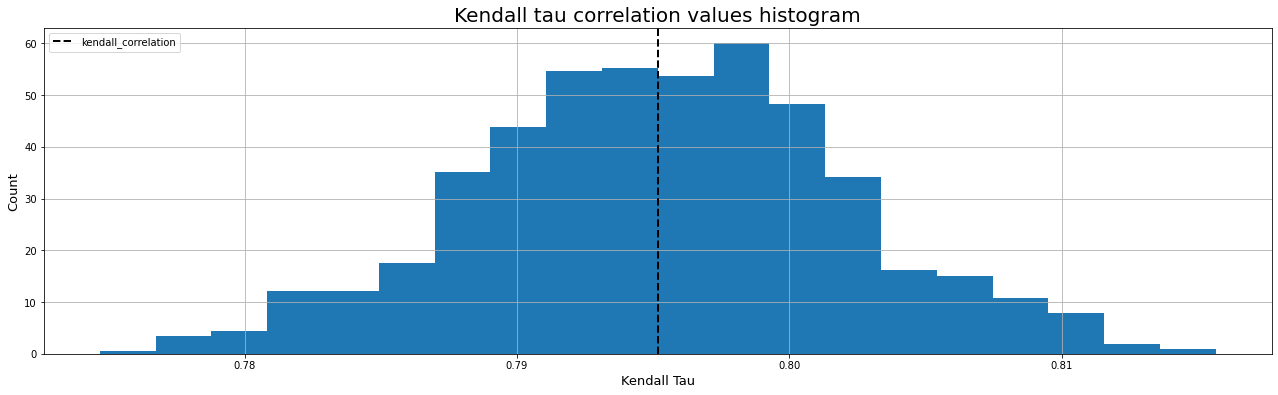

In [31]:
fig = plt.figure(figsize=(22, 6))
plt.hist(c_tau_list, density=True, bins=20)
plt.title('Kendall tau correlation values histogram', fontsize=20)
plt.ylabel('Count', fontsize=13)
plt.xlabel('Kendall Tau', fontsize=13)
plt.grid(True)
plt.axvline(kendall_correlation, color='k', linestyle='dashed', linewidth=2, label='kendall_correlation')
plt.legend(loc='upper left')

#### 5.D
Repeat Section 5.C for samples of $m={10, 50, 100, 500, 1000, 5000}$ points. <br>
What is the naive time complexity of each calculation? <br>
Compare the empirical time complexity and the standard deviation of the calucated values to the size of the sample.

In [32]:
m = [10, 50, 100, 500, 1000, 5000]
results_list = []
iterations = 1000

for sample_size in m:
    start_time = time.time()
    m_tau_list = choose_random_samples(sample_size, iterations) # 1000 iterations per m points
    end_time = time.time()
    results_list.append([end_time - start_time, m_tau_list[2]]) # the standard deviation value is at index 2

In [33]:
time_array = []
std_array = []

for i in range(len(m)):
    result_sample_size = m[i]
    result_time = results_list[i][0]
    result_std = results_list[i][1]
    
    time_array.append(result_time) 
    std_array.append(result_std)
    print(f'The empirical time complexity of the calculation {i} (sample size = {result_sample_size}) is {result_time} seconds, and its standard deviation is {result_std}')

print(f'\nThe naive time complexity of each calculation is ')

The empirical time complexity of the calculation 0 (sample size = 10) is 0.3992443084716797 seconds, and its standard deviation is 0.10954226649174348
The empirical time complexity of the calculation 1 (sample size = 50) is 0.4205951690673828 seconds, and its standard deviation is 0.03567843271874675
The empirical time complexity of the calculation 2 (sample size = 100) is 0.47143101692199707 seconds, and its standard deviation is 0.0236096539063104
The empirical time complexity of the calculation 3 (sample size = 500) is 1.0523509979248047 seconds, and its standard deviation is 0.009715380500679625
The empirical time complexity of the calculation 4 (sample size = 1000) is 1.8999803066253662 seconds, and its standard deviation is 0.00694682346902158
The empirical time complexity of the calculation 5 (sample size = 5000) is 9.004986047744751 seconds, and its standard deviation is 0.00310478388894632

The naive time complexity of each calculation is 


[Text(0.5, 0, 'number of sample points per iteration (m)'),
 Text(0, 0.5, 'Standard deviation')]

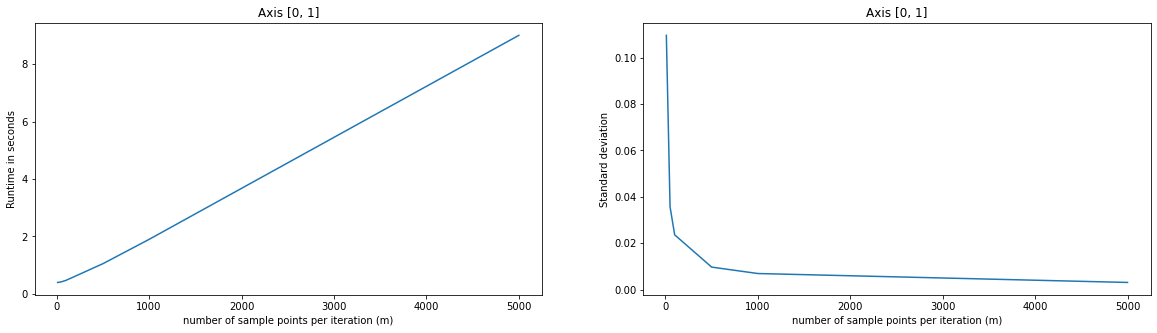

In [34]:
x_label = 'number of sample points per iteration (m)'
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(20, 5)
ax1.plot(m, time_array)
ax2.plot(m, std_array)
ax1.set_title('Axis [0, 1]')
ax2.set_title('Axis [0, 1]')
ax1.set(xlabel=x_label, ylabel='Runtime in seconds')
ax2.set(xlabel=x_label, ylabel='Standard deviation')

#### 5.E
A colleague found an old dataset which she believes originated from the same population as the data in Section 5.A. The dataset is avaialble as "Kendall_data.csv". 

Using Kendall correlation and your answer to Section 5.D, how much confidence do you have in rejecting your coleague's claim? Explain your answer and show your calculation.

##### Answer:
We use the Significance tests (or "statistical assessment" from lecture 9) method (Kendall, 1938), as seen in class:
If two permutations are uniformly and independently drawn in $S_n$ then
$$
Z=\frac{3(C-D)}{\sqrt{0.5 * n(n-1) /(2 n+5)}}
$$
has an approximately $N(0,1)$ distribution.

In our case, the two permutations are the columns from the CSV file.

We want to see for how many of these permutations we get a tau which is the value from 5A (tau = 0.795) or larger.
We take the tau we calculated in 5A and plug it in the equation.

In [35]:
from math import comb 

kendall_data = pd.read_csv('Kendall_data.csv', header=None)
x_values = kendall_data[0].values
y_values = kendall_data[1].values

e_kendall_corr = stats.kendalltau(x_values, y_values)[0]
print(f'Kendall correlation = {e_kendall_corr}')




n = 100
C_minus_D = kendall_corr * comb(n, 2)
C = (comb(n, 2) + C_minus_D) / 2
D = comb(n, 2) - C

Z = 3 * (C - D) / np.sqrt(0.5 * n * (n - 1) / (2 * n + 5)) # TODO: FIND REAL Z
print(f'Z = {Z}')

result = 1 - stats.norm.cdf(Z, loc=0, scale=1)
result

Kendall correlation = 0.7806556689451707


NameError: name 'kendall_corr' is not defined